In [1]:
import matplotlib.pyplot as plt
import pydicom as pyd
import SimpleITK as sitk
import os
import numpy as np
import cv2
from skimage.transform import resize

## CT

In [2]:
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_C_30112021/Simple-Axial/'
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_C_30112021/Contraste-axial/'
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_C_30112021/SUB-ADV-axial/'
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_30112021/axial/'
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_01122021/axial/'

pathpaciente = 'ACV-083'
pathestudio = 'CT_210222'
pathmodalidad = 'SER00002'
pathestado = 'stroke'
pathbase = '/home/gustavogarzon/Documents/foscal-stroke/'+pathestado+'/'+pathpaciente+'/'+pathestudio+'/'
path = pathbase+pathmodalidad+'/'

pathpng512 = pathbase+'png-axial/512/'
pathpng256 = pathbase+'png-axial/256/'
files = next(os.walk(path))[2]
#print(files, len(files))
#algo = otro

window = 120 #CT
level = 50
#window = 420
#level = 210
vmin = level - window/2
vmax = level + window/2

for f in files:
    fname = f
    #if int(f[3:])>54 and int(f[3:])<91:
    #if int(f[3:])>54 and int(f[3:])<103:
    #if int(f[3:])>1 and int(f[3:])<122:
    #if int(f[3:])>5 and int(f[3:])<25:
    if int(f[3:])>0 and int(f[3:])<1000:
        #print(fname)
        image = sitk.GetArrayFromImage(sitk.ReadImage(path+f))
        #print(image.shape, image.min(), image.max())
        img_min = image.min()
        img_max = image.max()
        #plt.imshow(image[0,:,:], cmap="gray")
        #plt.imshow(image[0,:,:], cmap="gray", vmin=vmin, vmax=vmax)
        plt.imsave(pathpng512+pathpaciente+"_"+pathestudio+"_"+fname+".png", image[0,:,:], cmap="gray", vmin=vmin, vmax=vmax)
        
        img = cv2.imread(pathpng512+pathpaciente+"_"+pathestudio+"_"+fname+".png")
        resized = resize(img[:,:,0],(256,256))
        plt.imsave(pathpng256+pathpaciente+"_"+pathestudio+"_"+fname+".png", resized, cmap="gray")

## MRI DWI

In [4]:
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_C_30112021/Simple-Axial/'
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_C_30112021/Contraste-axial/'
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_C_30112021/SUB-ADV-axial/'
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_30112021/axial/'
#path = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-001/CT_01122021/axial/'

pathpaciente = 'ACV-090'
pathestudio = 'RM_18032022'
pathmodalidad = 'SER00001'
pathestado = 'stroke'
pathbase = '/home/gustavogarzon/Documents/foscal-stroke/'+pathestado+'/'+pathpaciente+'/'+pathestudio+'/'
path = pathbase+pathmodalidad+'/'

pathpng512 = pathbase+'png-axial/512/'
pathpng256 = pathbase+'png-axial/256/'
files = next(os.walk(path))[2]
#print(files, len(files))
#algo = otro

window = 5500 #DWI
level = 3000
vmin = level - window/2
vmax = level + window/2

for f in files:
    fname = f
    #if int(f[3:])>54 and int(f[3:])<91:
    #if int(f[3:])>54 and int(f[3:])<103:
    #if int(f[3:])>1 and int(f[3:])<122:
    #if int(f[3:])>5 and int(f[3:])<25:
    if int(f[3:])>0 and int(f[3:])<1000:
        #print(fname)
        image = sitk.GetArrayFromImage(sitk.ReadImage(path+f))
        #print(image.shape, image.min(), image.max())
        img_min = image.min()
        img_max = image.max()
        #plt.imshow(image[0,:,:], cmap="gray")
        #plt.imshow(image[0,:,:], cmap="gray", vmin=vmin, vmax=vmax)
        plt.imsave(pathpng512+pathpaciente+"_"+pathestudio+"_"+fname+".png", image[0,:,:], cmap="gray")
        
        img = cv2.imread(pathpng512+pathpaciente+"_"+pathestudio+"_"+fname+".png")
        resized = resize(img[:,:,0],(256,256))
        plt.imsave(pathpng256+pathpaciente+"_"+pathestudio+"_"+fname+".png", resized, cmap="gray")

(1, 512, 512) -2048 90


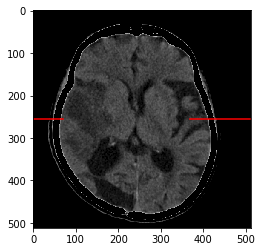

In [119]:
pathbase = '/home/gustavogarzon/Documents/foscal-stroke/stroke/ACV-083/CT_220222/SER00002/'
f = 'I00014'

original = sitk.ReadImage(pathbase+f)

window = 120 #CT
level = 60
vmin = level - window/2
vmax = level + window/2

#T1_WINDOW_LEVEL = (60,120)
#img = sitk.Cast(sitk.IntensityWindowing(original, windowMinimum=T1_WINDOW_LEVEL[1]-T1_WINDOW_LEVEL[0]/2.0, windowMaximum=T1_WINDOW_LEVEL[1]+T1_WINDOW_LEVEL[0]/2.0), sitk.sitkUInt8)
#print(sitk.GetArrayFromImage(img).shape)
#img2 = sitk.GetArrayFromImage(img)

image = sitk.GetArrayFromImage(original)
image[image>90] = -2048
image[image<4] = -2048
#print(img2[0,256,:])
print(image.shape, image.min(), image.max())
#img_min = image.min()
#img_max = image.max()
#plt.imshow(image[0,:,:], cmap="gray")
plt.imshow(image[0,:,:], cmap="gray", vmin=vmin, vmax=vmax)
x = np.arange(0,72)
y = 256*np.ones((72))
plt.plot(x, y, c="red")
x = np.arange(368,512)
y = 256*np.ones((144))
plt.plot(x, y, c="red")